In [ ]:
# Bonus Analysis – Trader Behavior Exploration

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged dataset
merged_df = pd.read_csv("csv_files/merged_data.csv")

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load merged dataset
merged_df = pd.read_csv("csv_files/merged_data.csv")

# Optional: Convert date column to datetime if needed
# merged_df['Timestamp IST'] = pd.to_datetime(merged_df['Timestamp IST'])


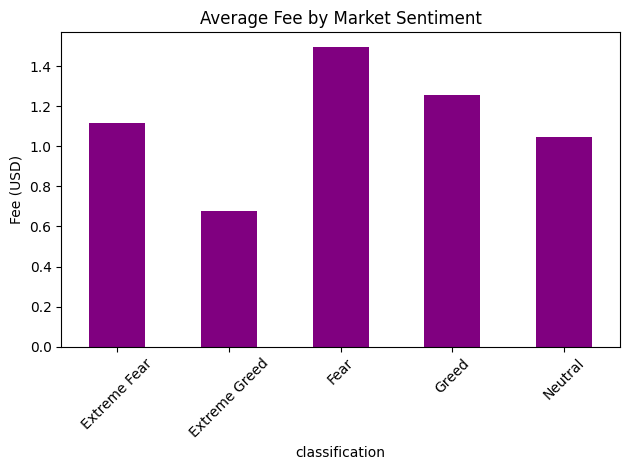

In [5]:
# Convert Fee to numeric
import pandas as pd


merged_df['Fee'] = pd.to_numeric(merged_df['Fee'], errors='coerce')

# Plot average Fee per sentiment
avg_fee = merged_df.groupby('classification')['Fee'].mean()
avg_fee.plot(kind='bar', color='purple')
plt.title("Average Fee by Market Sentiment")
plt.ylabel("Fee (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/avg_fee_by_sentiment.png")
plt.show()


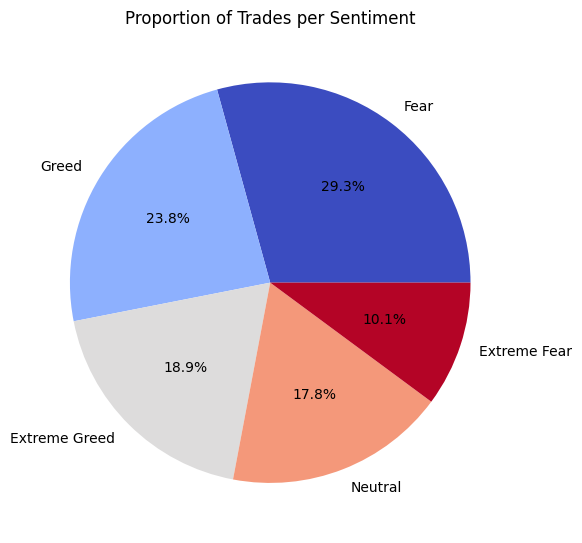

In [6]:
# Count number of trades per sentiment
sentiment_counts = merged_df['classification'].value_counts()

# Plot pie chart
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colormap='coolwarm', figsize=(6,6))
plt.title("Proportion of Trades per Sentiment")
plt.ylabel("")  # Hide y-label
plt.tight_layout()
plt.savefig("outputs/trades_per_sentiment_pie.png")
plt.show()



        Size USD  Closed PnL
52185     479.71    0.000000
171374     20.81   -0.015295
21204    2996.46    0.000000
167707   6633.42    0.000000
42695      11.21    0.000000


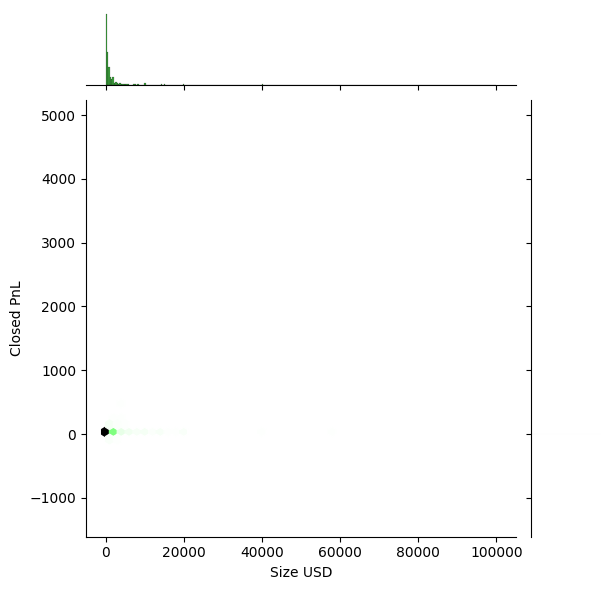

In [4]:
sample_df = merged_df[['Size USD', 'Closed PnL']].dropna().sample(1000, random_state=42)
sample_df = sample_df[sample_df['Size USD'] < 100000]  # remove large outliers

print(sample_df.head())  # Print first 5 rows

sns.jointplot(data=sample_df, x='Size USD', y='Closed PnL', kind='hex', color='green')
plt.savefig("outputs/pnl_vs_size_heatmap.png")
plt.show()

In [5]:
sample_df = sample_df[sample_df['Closed PnL'].abs() < 50000]

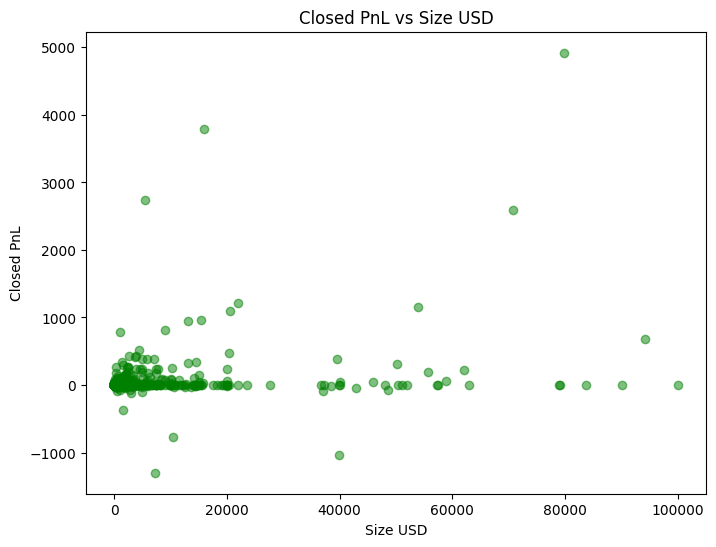

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(sample_df['Size USD'], sample_df['Closed PnL'], alpha=0.5, color='green')
plt.xlabel('Size USD')
plt.ylabel('Closed PnL')
plt.title('Closed PnL vs Size USD')
plt.savefig("outputs/pnl_vs_size_scatter.png")
plt.show()